# Group Meeting 9.3.20

## "Using SignalProcessing.py"

### Step 1 - Import the package
The functions exist within a package file containing a "~.py" extension, to access these functions the package must be imported into the workspace (in this case a Jupyter Notebook)
* Be sure to have this notebook open in the directory containing the package. I recommend copying the package to whatever folders you keep the work spaces

In [1]:
import SignalProcessing 

### Step 2 - Provide path to data file(s)
Most workspaces can work directly with data, so saving the filename as a global variable within the notebook can be very useful*

* *Be careful of the order cells are executed when working in a Jupyter Notebook*

In [2]:
testfile = '/mnt/b/Zhang Lab/Data/NP Encapsulation July 2020/7.5.20/60nm_Ag_NP_collisions_CFE1_0.22_psi_a1_b1_7.5.20.txt'

### Step 3 - Use peak_detector's zoom function to determine optimal detection parameters
The width and signal to noise ratio of the peak detection function will likely need to be tuned to fit the particular data

```
def peak_detector(file, SNR, wval, gain_adj, zoom = False):
    """Function which uses scipy peak detector to find peaks within a 
    set of NP collision data.
    
    Input: .txt file (typically converted from .atf file format) 
    NO HEADER ONLY DATA [That means delete all information except 
    for the current and time values], desired signal to noise ratio of peaks,
    width value of peak (wval; tuneable), gain_adjustment value. 
    If zoom = True: 
    the plotted graph will be zoomed to the 300 ms interval with 
    the highest density of detected peaks. 
    
    Output: number of peaks, frequency, and average half-width are 
    read out to screen; array of peak indices is output; 
    optional: plot zoomed to show interval of highest peak density
    -------------------------------------------------------------------------"""
```
    

#### Example 


Total number of detected peaks: 13171

Frequency of peaks (Hz): 439.9056662695459

Average peak height (pA): 10.14021550831372


[13171,
 439.9056662695459,
 array([    203,    1095,    1097, ..., 2992447, 2992452, 2992456]),
 0         -2.62803
 1         -2.62803
 2         -2.62803
 3         -5.67979
 4         -5.67979
             ...   
 2994047   -1.94360
 2994048   -1.94360
 2994049   -1.94360
 2994050   -1.94360
 2994051   -1.94360
 Name: gain_adj_y, Length: 2994052, dtype: float64,
 array([ -5.2866168 ,  -5.28979181,  -5.29296683, ..., -16.70260726,
        -16.70669852, -16.71078978])]

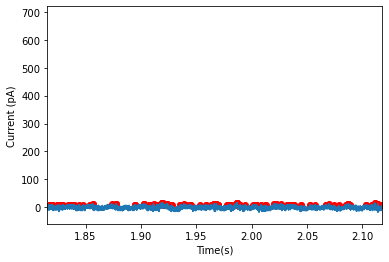

In [3]:
SignalProcessing.peak_detector(testfile, 3, 10, 10, zoom = True)

**Not great, we can do better. Let's try a higher SNR** 


Total number of detected peaks: 37

Frequency of peaks (Hz): 1.2357838927927416

Average peak height (pA): 171.31061891891892


[37,
 1.2357838927927416,
 array([ 231665,  287457,  287459,  465046,  465049,  465169,  475454,
         475460,  475579,  724313,  724522,  724608,  724611,  724613,
         724681,  724683,  725093,  735316,  735318,  735321,  735325,
         735327,  735329,  735478,  735712, 1746894, 1746897, 1754578,
        1754637, 1756108, 1756110, 1909959, 1916244, 1916250, 2155333,
        2230249, 2230254]),
 0         -2.62803
 1         -2.62803
 2         -2.62803
 3         -5.67979
 4         -5.67979
             ...   
 2994047   -1.94360
 2994048   -1.94360
 2994049   -1.94360
 2994050   -1.94360
 2994051   -1.94360
 Name: gain_adj_y, Length: 2994052, dtype: float64,
 array([ -5.2866168 ,  -5.28979181,  -5.29296683, ..., -16.70260726,
        -16.70669852, -16.71078978])]

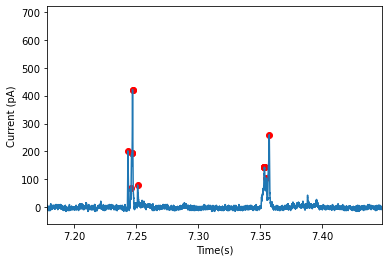

In [4]:
SignalProcessing.peak_detector(testfile, 10, 10, 10, zoom = True)

**Okay much better job, but it still seems too sensitive. What happens when we adjust the width?**


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069


[29,
 0.9685873754321488,
 array([ 231665,  287457,  287459,  465046,  465049,  465169,  475579,
         724313,  724681,  724683,  725093,  735316,  735318,  735321,
         735325,  735327,  735329,  735712, 1746894, 1746897, 1754578,
        1756108, 1756110, 1909959, 1916244, 1916250, 2155333, 2230249,
        2230254]),
 0         -2.62803
 1         -2.62803
 2         -2.62803
 3         -5.67979
 4         -5.67979
             ...   
 2994047   -1.94360
 2994048   -1.94360
 2994049   -1.94360
 2994050   -1.94360
 2994051   -1.94360
 Name: gain_adj_y, Length: 2994052, dtype: float64,
 array([ -5.2866168 ,  -5.28979181,  -5.29296683, ..., -16.70260726,
        -16.70669852, -16.71078978])]

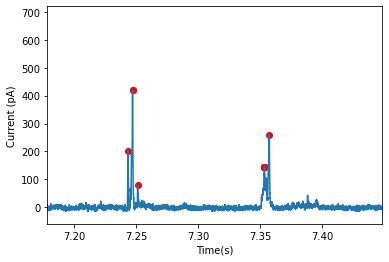

In [5]:
SignalProcessing.peak_detector(testfile, 10, 35, 10, zoom = True)

#### *Final Result*


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069


[29,
 0.9685873754321488,
 array([ 231665,  287457,  287459,  465046,  465049,  465169,  475579,
         724313,  724681,  724683,  725093,  735316,  735318,  735321,
         735325,  735327,  735329,  735712, 1746894, 1746897, 1754578,
        1756108, 1756110, 1909959, 1916244, 1916250, 2155333, 2230249,
        2230254]),
 0         -2.62803
 1         -2.62803
 2         -2.62803
 3         -5.67979
 4         -5.67979
             ...   
 2994047   -1.94360
 2994048   -1.94360
 2994049   -1.94360
 2994050   -1.94360
 2994051   -1.94360
 Name: gain_adj_y, Length: 2994052, dtype: float64,
 array([ -5.2866168 ,  -5.28979181,  -5.29296683, ..., -16.70260726,
        -16.70669852, -16.71078978])]

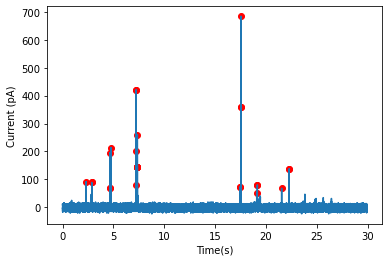

In [6]:
SignalProcessing.peak_detector(testfile, 10, 35, 10)


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069
CPU times: user 21.1 s, sys: 14 s, total: 35.1 s
Wall time: 34.6 s


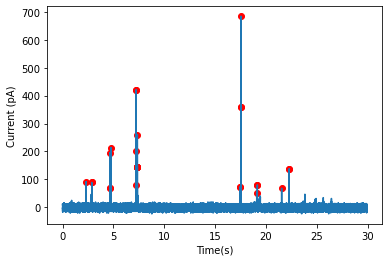

In [7]:
%%time 
# Using these nodes to show how long the code takes to run, ignore the dupicate outputs
x = SignalProcessing.peak_detector(testfile, 10, 35, 10)

### Step 4 - Finding peak widths 
Now that the detection parameters provide a reasonable result, we can use the indices output from the peak_detector function with scipy.peak_widths()

#### Example 


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069

Average Half-width (ms): 0.6810961686297529


array([0.57742533, 0.51002982, 0.51002982, 0.37249991, 0.37249991,
       0.44416536, 0.35867912, 0.52333403, 0.58016177, 0.58016177,
       0.69000011, 1.13000147, 1.13000147, 1.13000147, 1.13000147,
       1.13000147, 1.13000147, 1.1666679 , 0.52499762, 0.52499762,
       0.51839849, 0.41249963, 0.41249963, 1.06999885, 0.54745859,
       0.54745859, 0.78747866, 0.47016876, 0.47016876])

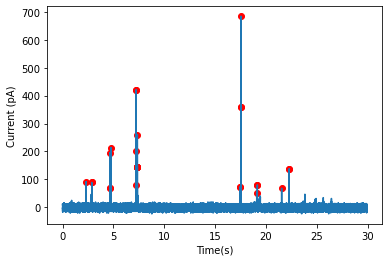

In [8]:
SignalProcessing.find_half_widths(testfile, 10 , 35, 10)


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069

Average Half-width (ms): 0.6810961686297529
CPU times: user 22 s, sys: 13.2 s, total: 35.2 s
Wall time: 35 s


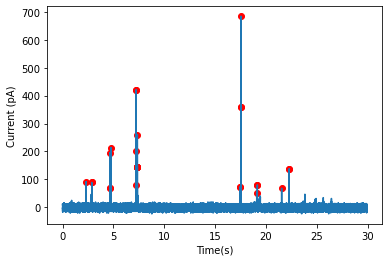

In [9]:
%%time 
y = SignalProcessing.find_half_widths(testfile, 10 , 35, 10)

### Step 5 - Finding Peak Areas

#### Example


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069

Average peak area (fC): 241.61833561634012


array([320.22864772, 223.18642965, 223.18642965,  49.87730417,
        49.87730417, 240.21762108, 113.4900908 , 105.95992204,
       420.12374891, 420.12374891, 132.10314729, 320.08140765,
       320.08140765, 320.08140765, 320.08140765, 320.08140765,
       320.08140765, 658.9727504 ,  39.61041064,  39.61041064,
       482.97889409, 160.44555708, 160.44555708,  54.03709099,
       389.08200276, 389.08200276, 156.93074977, 128.4367332 ,
       128.4367332 ])

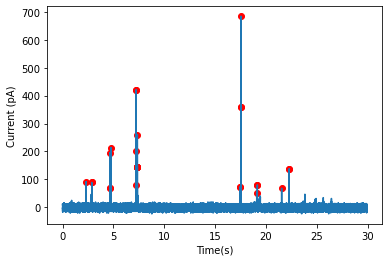

In [10]:
SignalProcessing.calc_peak_area(testfile, 10, 35, 10)


Total number of detected peaks: 29

Frequency of peaks (Hz): 0.9685873754321488

Average peak height (pA): 178.5185275862069

Average peak area (fC): 241.61833561634012
CPU times: user 22.3 s, sys: 13.8 s, total: 36.1 s
Wall time: 37.8 s


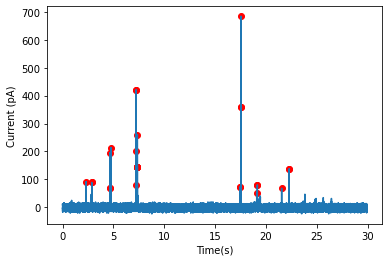

In [11]:
%%time 
charges = SignalProcessing.calc_peak_area(testfile, 10, 35, 10)

### Step 6 - Estimate Particle Size from Charges 
Its helpful to store the array of charges as a variable to input for this function as I did above.

In [12]:
SignalProcessing.calc_particle_rads(charges, "fC", "Ag")

Average estimated particle radius (nm): 17.376596111261968


array([20.12139416, 17.83996247, 17.83996247, 10.82610742, 10.82610742,
       18.28267035, 14.2393661 , 13.91720053, 22.02742606, 22.02742606,
       14.97875542, 20.11830977, 20.11830977, 20.11830977, 20.11830977,
       20.11830977, 20.11830977, 25.59335143, 10.02554036, 10.02554036,
       23.07530193, 15.98136633, 15.98136633, 11.11907506, 21.47097283,
       21.47097283, 15.86380482, 14.83887894, 14.83887894])